In [30]:
import pandas as pd
import numpy as np
import plotly.express as px

In [31]:
heart = pd.read_csv('week1/Data/heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [32]:
heart.dropna(axis = 1, inplace = True)

In [33]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [34]:
correlation = np.round(heart.corr(), 2)
fig = px.imshow(correlation, text_auto = True)
fig.show()

In [35]:
X = heart.drop(['target','oldpeak'], axis = 1)
y = heart['target']

In [36]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [37]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal
651,41,1,1,120,157,0,1,182,0,2,0,2
306,44,0,2,118,242,0,1,149,0,1,1,2
5,58,0,0,100,248,0,0,122,0,1,0,2
854,65,1,3,138,282,1,0,174,0,1,1,2
215,49,1,1,130,266,0,1,171,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
274,66,1,0,160,228,0,0,138,0,2,0,1
826,42,1,2,130,180,0,1,150,0,2,0,2
762,56,1,1,130,221,0,0,163,0,2,0,3
158,67,0,2,115,564,0,0,160,0,1,0,3


In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
y_hat

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1])

In [39]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN

In [40]:
k = 1
my_KNN_model = KNN(n_neighbors=k)

In [41]:
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.18536585365853658


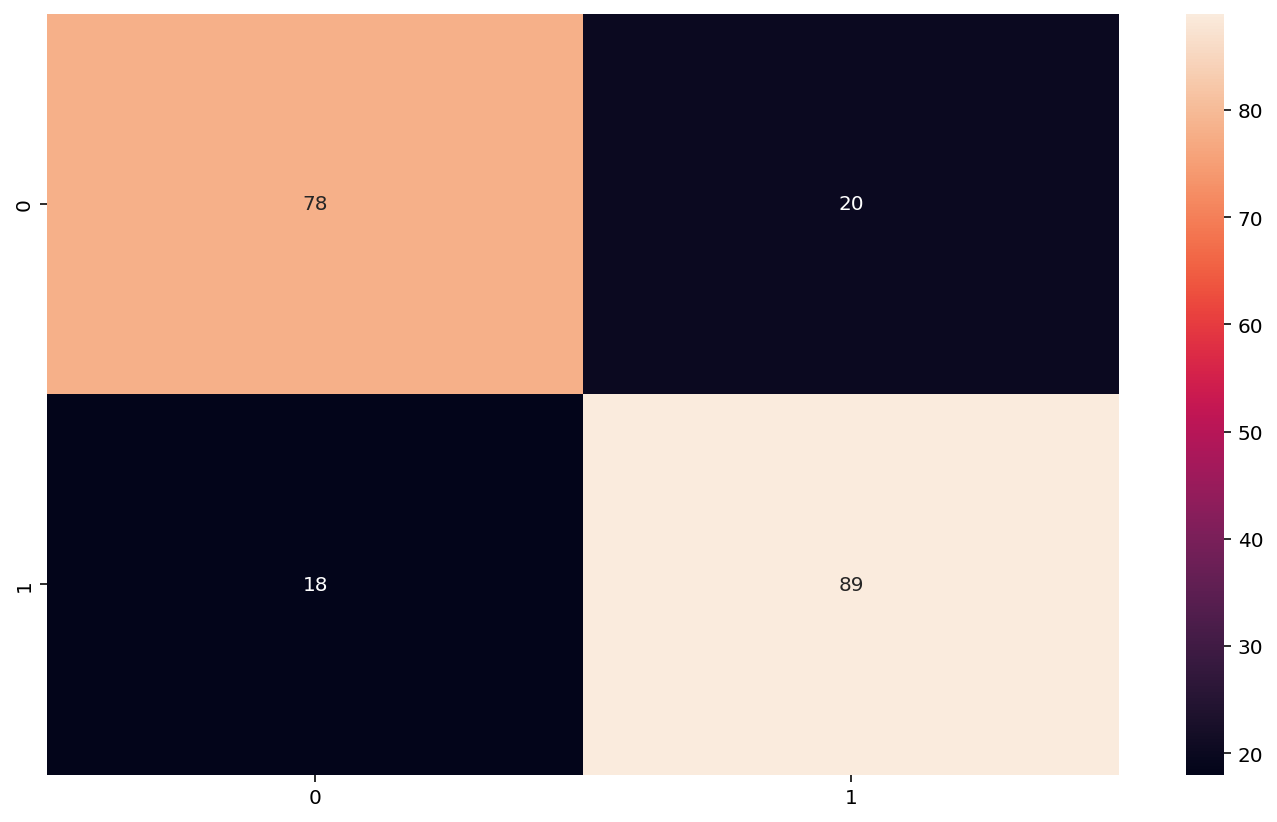

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [43]:
from sklearn.svm import SVC

In [44]:
svc_model = SVC()

In [138]:
X = heart.drop(['target',], axis = 1)
y = heart['target']

In [139]:
svc_model.fit(X_train, y_train)

SVC()

In [140]:
y_hat = svc_model.predict(X_test)

In [141]:
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.28780487804878047


In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)
#exang, ca, cp, age - the accuracy is 65%, error rate is 34%
#restecg, fbs, chol, slope, sex, trestbps, thalach - accuracy is 71% and there is an error rate of 28%

0.7121951219512195

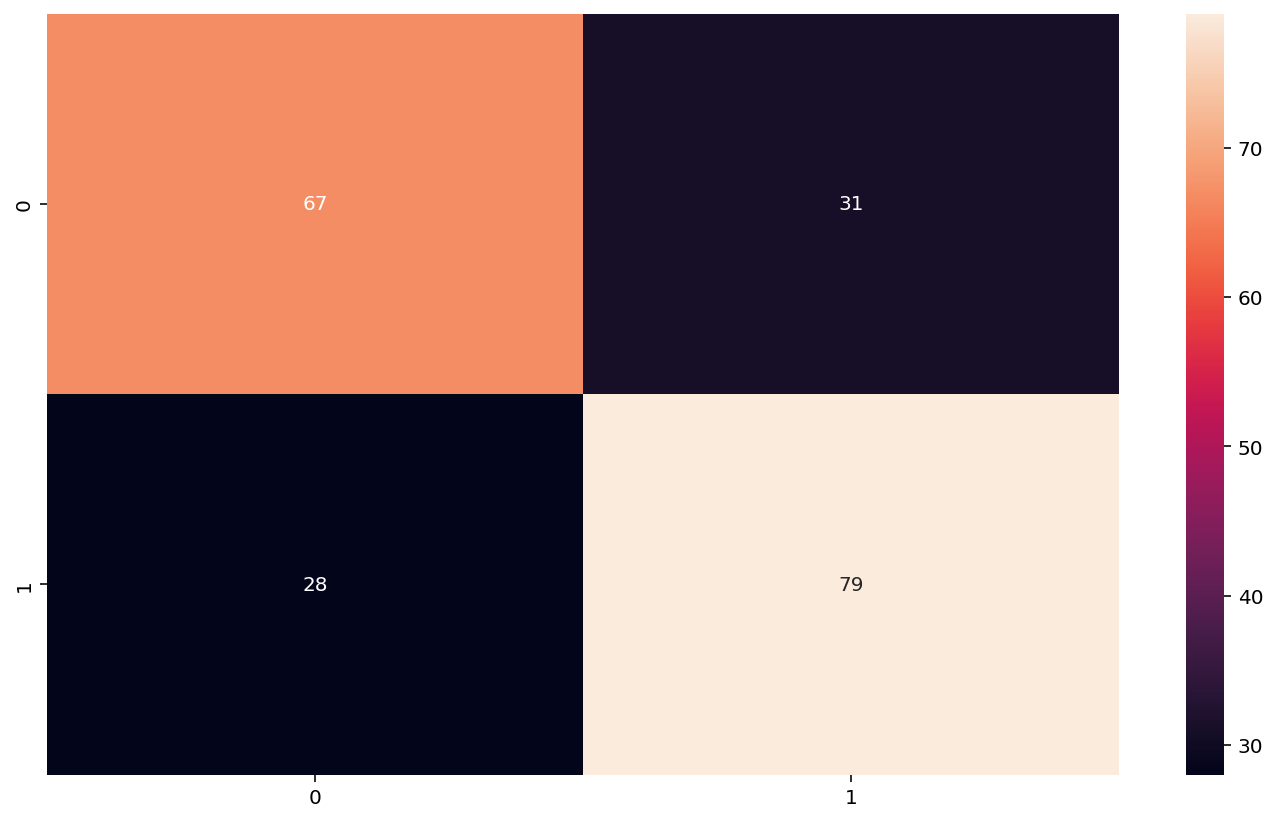

In [127]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g') 

# - 71% TP (the predicted value is postive and it's postive) 34% FP (the predicted value is positive but it's false) 23% FN (the predicted value is negative but its positive) 77% TN (the predicted value is negative and it's negative)

#exang, ca, cp, age - 62 TP, 55 FP, 16, FN, 72 TN
#restecg, fbs, chol, slope, sex, trestbps, thalach, thal, oldpeak - 67 TP, 31 FP, 28 FN, 79 TN
